Naše dáta obsahujú viac ako 100 MB záznamov, mnohé kategorické premenné a pod. a preto si potrebujeme najprv upraviť dataset, predpripraviť ho na použitie a následne importovat do našej navrdhnutej siete.

Ako výsledok dosiahneme očistené transformované dáta od outlierov, nepresných hodnôt a použijeme subset dát na základe kritérií, ktorý si následne vzesportujeme do csv pre daľšie použitie.

Aby sme mohli pracovat s datami, spravit korelaciu a podobne potrebujeme prerobit cely dataset na numericke hodnoty

Nase data budu obsahovat, ze 


END result will get 2 files: one csv, and other npy encoded

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as ss
import itertools 
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = pd.read_csv("database.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
file.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
# skontrolujeme aký tvar má databáza, s ktorou budeme pracovať
file.shape

(638454, 24)

In [5]:
# skontrolujeme, či sa nachádzajú nejaké chýbajúce hodnoty, 
file.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [8]:
file['Perpetrator Age']=pd.to_numeric(file['Perpetrator Age'], errors='coerce')

In [9]:
file.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          1
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [10]:
file.dropna()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [11]:
file.info

<bound method DataFrame.info of         Record ID Agency Code      Agency Name       Agency Type        City  \
0               1     AK00101        Anchorage  Municipal Police   Anchorage   
1               2     AK00101        Anchorage  Municipal Police   Anchorage   
2               3     AK00101        Anchorage  Municipal Police   Anchorage   
3               4     AK00101        Anchorage  Municipal Police   Anchorage   
4               5     AK00101        Anchorage  Municipal Police   Anchorage   
...           ...         ...              ...               ...         ...   
638449     638450     WY01500      Park County           Sheriff        Park   
638450     638451     WY01700  Sheridan County           Sheriff    Sheridan   
638451     638452     WY01701         Sheridan  Municipal Police    Sheridan   
638452     638453     WY01800  Sublette County           Sheriff    Sublette   
638453     638454     WY01902     Rock Springs  Municipal Police  Sweetwater   

       

In [12]:
file1 = file.iloc[:,:].values

In [13]:
type(file)

pandas.core.frame.DataFrame

In [14]:
type(file1)

numpy.ndarray

In [15]:
file1

array([[1, 'AK00101', 'Anchorage', ..., 0, 0, 'FBI'],
       [2, 'AK00101', 'Anchorage', ..., 0, 0, 'FBI'],
       [3, 'AK00101', 'Anchorage', ..., 0, 0, 'FBI'],
       ...,
       [638452, 'WY01701', 'Sheridan', ..., 0, 0, 'FBI'],
       [638453, 'WY01800', 'Sublette County', ..., 0, 1, 'FBI'],
       [638454, 'WY01902', 'Rock Springs', ..., 0, 1, 'FBI']],
      dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
victim_sex = LabelEncoder()

In [18]:
file1[:,11]=victim_sex.fit_transform(file1[:,11])

In [19]:
file1[:,11]

array([1, 1, 0, ..., 0, 1, 0], dtype=object)

In [20]:
file['Victim Sex']

0           Male
1           Male
2         Female
3           Male
4         Female
           ...  
638449      Male
638450      Male
638451    Female
638452      Male
638453    Female
Name: Victim Sex, Length: 638454, dtype: object

In [21]:
victim_sex

LabelEncoder()

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [23]:
ohe.fit_transform(file[['Victim Sex']])

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [24]:
ohe.categories_

[array(['Female', 'Male', 'Unknown'], dtype=object)]

<AxesSubplot:xlabel='Victim Age'>

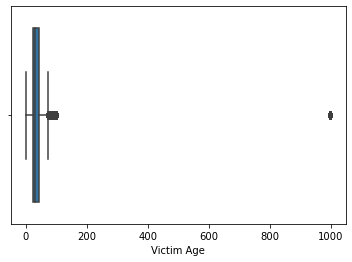

In [25]:
sns.boxplot(x='Victim Age', data = file)

<AxesSubplot:>

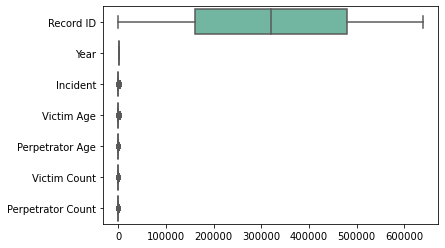

In [26]:
sns.boxplot(data=file, orient = 'h', palette="Set2")

<AxesSubplot:>

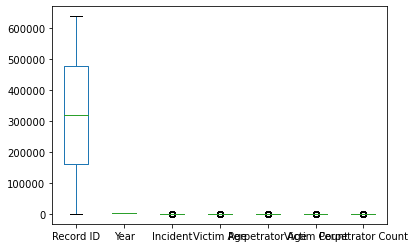

In [27]:
file.plot(kind='box')

In [28]:
#file = file.drop(file.loc[file['Victim Age']>120].index, inplace=True)

In [29]:
file_to_see_outliers = file.drop(labels=['Record ID', 'Year', 'Incident'], axis=1)

<AxesSubplot:>

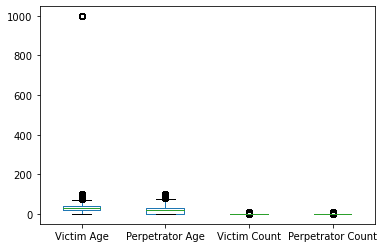

In [30]:
file_to_see_outliers.plot(kind='box')


In [31]:
file= file.drop(labels=file.nlargest(1,'Victim Age').index, axis=0)

In [32]:
file

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [111]:
file= file.dropna()

In [113]:
file['Perpetrator Age'].astype(int)

0         15
1         42
2          0
3         42
4          0
          ..
638449     0
638450    57
638451    22
638452    31
638453    24
Name: Perpetrator Age, Length: 628198, dtype: int32

In [33]:
file['Victim Age'].unique()

array([ 14,  43,  30,  42,  99,  32,  38,  36,  20,  48,  31,  16,  33,
        27,  21,  60,  40,  18,   8,  25,  24,  46,  23,  22,  45,  26,
        58,  17,  29,  41,  68,  13,  35,  44,  54,  37,  51,  90,  50,
        52,  61,  63,  19,  28,  70,  72,  74,  53,  57,  76,  79,  69,
        34,  66,  55,  67,  65,  47,   1,  49,  62,  75,  56,  59,  78,
        39,  15,   0,  71,  77,   2,   4,  64,  82,  85,   6,   5,   7,
         9,  84,  10,  86,  11,  73,  83,  81,  87,  80,   3,  12,  94,
       998,  93,  92,  89,  97,  88,  91,  95,  98,  96], dtype=int64)

In [34]:
file_to_see_outliers = file.drop(labels=['Record ID', 'Year', 'Incident'], axis=1)

In [37]:
file

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [38]:
file_to_see_outliers = file.drop(labels=['Record ID', 'Year', 'Incident'], axis=1)

<AxesSubplot:>

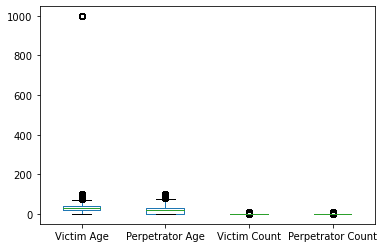

In [39]:
file_to_see_outliers.plot(kind='box')

In [40]:
file['Victim Age'].value_counts()

22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: Victim Age, Length: 101, dtype: int64

In [41]:
file[file['Victim Age'] == 998].shape[0]

973

In [56]:
temp_to_delete = []
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==998:
        temp_to_delete.append(x-1)
    

In [57]:
temp_to_delete

[4228,
 5456,
 5488,
 5489,
 5490,
 5582,
 5617,
 8765,
 9404,
 14031,
 16153,
 23035,
 23036,
 27842,
 27971,
 27980,
 27987,
 28013,
 28017,
 28047,
 28066,
 28149,
 29060,
 29365,
 29399,
 32241,
 35622,
 35634,
 35830,
 36383,
 41022,
 41289,
 45801,
 49108,
 49137,
 49266,
 50430,
 50596,
 50692,
 52297,
 52779,
 56563,
 56863,
 62641,
 62647,
 69313,
 69318,
 69329,
 69331,
 69342,
 69376,
 69385,
 69402,
 69431,
 69433,
 69449,
 69476,
 69484,
 72923,
 77793,
 78324,
 81254,
 83079,
 85211,
 88588,
 88800,
 88811,
 88897,
 88898,
 88962,
 88977,
 89017,
 89018,
 89025,
 89026,
 89029,
 89038,
 89051,
 89095,
 89102,
 89111,
 89379,
 89407,
 91856,
 94500,
 95184,
 95853,
 95904,
 96152,
 96469,
 96552,
 96875,
 97245,
 100708,
 100965,
 101549,
 102172,
 102183,
 103228,
 107165,
 107253,
 107293,
 107357,
 107404,
 108502,
 108560,
 113105,
 114525,
 115144,
 115146,
 115154,
 117516,
 118192,
 118242,
 119821,
 119935,
 120058,
 121586,
 121674,
 121787,
 121809,
 125461,
 125

In [58]:
file = file.drop(labels=temp_to_delete, axis=0)

<AxesSubplot:xlabel='Year', ylabel='count'>

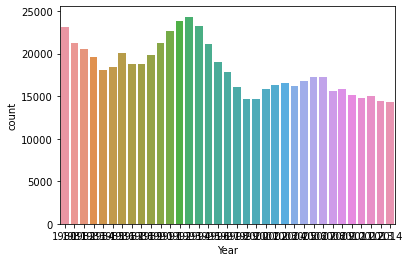

In [55]:
sns.countplot(x = 'Year', data = file)

In [59]:
file[file['Victim Age'] == 998].shape[0]

0

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

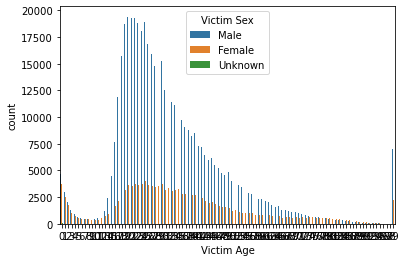

In [63]:
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

In [64]:
file[file['Victim Age'] == 99].shape[0]

9281

In [65]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==99:
        temp_to_delete.append(x-1)
    

In [66]:
file = file.drop(labels=temp_to_delete, axis=0)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

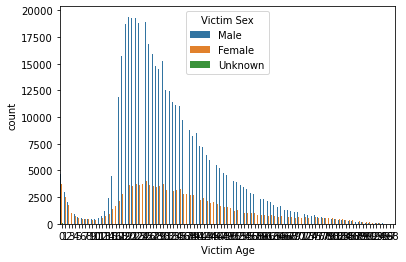

In [67]:
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

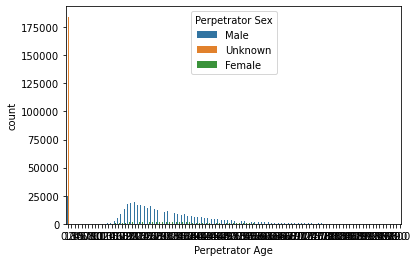

In [68]:
sns.countplot(x='Perpetrator Age', hue='Perpetrator Sex',data = file)

In [76]:
file[(file['Perpetrator Age'] == 0)].shape[0]

210059

In [77]:
file[(file['Perpetrator Sex'] == 'Unknown')].shape[0]

184931

In [78]:
file[(file['Crime Solved'] == 'No')].shape[0]

184847

In [70]:
len(file)

628199

In [71]:
628199 - 210059

418140

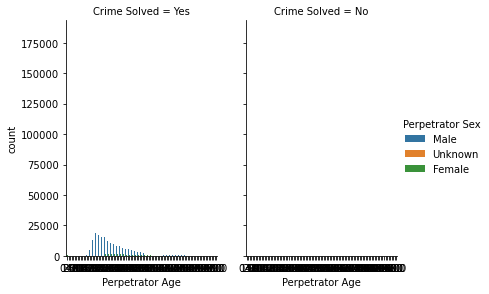

In [80]:
g = sns.catplot(x="Perpetrator Age", hue="Perpetrator Sex", col="Crime Solved",
                data=file, kind="count",
                height=4, aspect=.7);

In [87]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Perpetrator Sex']):
    if y== 'Unknown':
        temp_to_delete.append(x-1)
    

In [88]:
file_without_age_outlier = file.drop(labels=temp_to_delete)

In [89]:
file_without_age_outlier

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36.0,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27.0,Black,Unknown,Wife,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638448,638449,WY01301,Casper,Municipal Police,Natrona,Wyoming,2014,August,1,Murder or Manslaughter,...,Unknown,Male,67.0,Black,Unknown,Friend,Firearm,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI


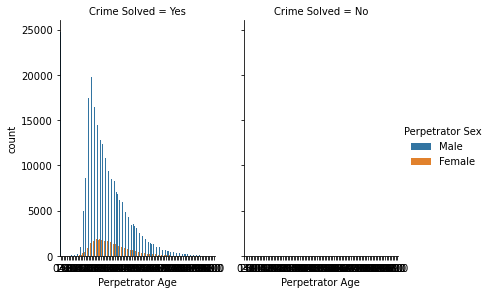

In [90]:
g = sns.catplot(x="Perpetrator Age", hue="Perpetrator Sex", col="Crime Solved",
                data=file_without_age_outlier, kind="count",
                height=4, aspect=.7);

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

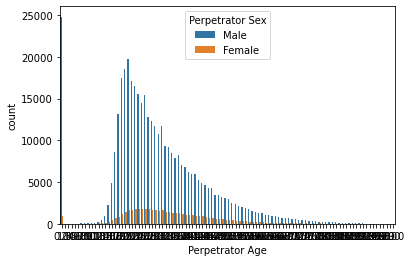

In [92]:
sns.countplot(x='Perpetrator Age', hue='Perpetrator Sex',data = file_without_age_outlier)

In [93]:
# corelation between city and if the crime is solved
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [101]:
cramers_v(file['City'],file['Crime Solved'])


0.2766363884612604

In [102]:
file.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [119]:
n = 200000  #chunk row size
list_df = [file[i:i+n] for i in range(0,file.shape[0],n)]

[        Record ID Agency Code Agency Name       Agency Type       City  \
 0               1     AK00101   Anchorage  Municipal Police  Anchorage   
 1               2     AK00101   Anchorage  Municipal Police  Anchorage   
 2               3     AK00101   Anchorage  Municipal Police  Anchorage   
 3               4     AK00101   Anchorage  Municipal Police  Anchorage   
 4               5     AK00101   Anchorage  Municipal Police  Anchorage   
 ...           ...         ...         ...               ...        ...   
 203655     203656     CT00015  Bridgeport  Municipal Police  Fairfield   
 203656     203657     CT00015  Bridgeport  Municipal Police  Fairfield   
 203657     203658     CT00015  Bridgeport  Municipal Police  Fairfield   
 203658     203659     CT00015  Bridgeport  Municipal Police  Fairfield   
 203659     203660     CT00015  Bridgeport  Municipal Police  Fairfield   
 
               State  Year    Month  Incident              Crime Type  ...  \
 0            Alaska

In [123]:
cols = ['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source']
corrM = np.zeros((len(cols),len(cols)))
n = 20000  #chunk row size
list_df = [file[i:i+n] for i in range(0,file.shape[0],n)]
for chunk in list_df:
# there's probably a nice pandas way to do this
    for col1, col2 in itertools.combinations(cols, 2):
        idx1, idx2 = cols.index(col1), cols.index(col2)
        corrM[idx1, idx2] = cramers_v(list_df[col1], list_df[col2])
        corrM[idx2, idx1] = corrM[idx1, idx2]
    
    corr = pd.DataFrame(corrM, index=cols, columns=cols)
    file2 = pd.concat(corr)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

TypeError: list indices must be integers or slices, not str

In [116]:
confusion_matrix_test = pd.crosstab(file['Record ID'], file['Victim Sex'])

In [125]:
list_df

[       Record ID Agency Code Agency Name       Agency Type       City   State  \
 0              1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
 1              2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
 2              3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
 3              4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
 4              5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
 ...          ...         ...         ...               ...        ...     ...   
 20302      20303     TX12601    Alvarado  Municipal Police    Johnson   Texas   
 20303      20304     TX12603    Cleburne  Municipal Police    Johnson   Texas   
 20304      20305     TX12603    Cleburne  Municipal Police    Johnson   Texas   
 20305      20306     TX12603    Cleburne  Municipal Police    Johnson   Texas   
 20306      20307     TX12603    Cleburne  Municipal Police    Johnson   Texas   
 
        Year  

In [117]:
confusion_matrix_test

Victim Sex,Female,Male,Unknown
Record ID,,,
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
5,1,0,0
...,...,...,...
638450,0,1,0
638451,0,1,0
638452,1,0,0


In [ ]:
cols.index(col1)

In [ ]:
idx1, idx2 = cols.index(col1), cols.index(col2)